In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

import itertools
import glob

In [15]:
%run plotting.py
%run spice_tools.py

In [16]:
moon_polar_radius = 1736e3  # m
JULIAN_DAY = 86400.0
JULIAN_DAY_ON_J2000 = 2451545.0

pos_names = ["pos_x", "pos_y", "pos_z"]
acc_names = ["acc_grav_moon", "acc_grav_earth", "acc_grav_sun", "acc_rp_sun", "acc_rp_moon"]
output_folder = "../../tudat-bundle/output/lro/baseline"

In [17]:
def read_simulation_results(dependent_variable_history_file):
    def gen_vector_colnames(names):
        colnames = []
        for name in names:
            if "kepler" in name:
                elements = ["a", "e", "i", "longAscNode", "argPeri", "trueAnom"]
            else:
                elements = ["x", "y", "z"]
            colnames.extend([f"{name}_{elem}" for elem in elements])
        return colnames
    
    df = pd.read_csv(dependent_variable_history_file,
                         names=gen_vector_colnames(["pos", "vel", "kepler", "pos_sun"] + acc_names))
    df["t_et"] = df.index
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D')
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    df["r_sun"] = np.sqrt(np.square(df[["pos_sun_x", "pos_sun_y", "pos_sun_z"]]).sum(axis=1))
    for acc in acc_names:
        df[acc] =np.sqrt(np.square(df[[f"{acc}_x", f"{acc}_y", f"{acc}_z"]]).sum(axis=1)) 
    
    return df

df_simulation = read_simulation_results(f"{output_folder}/lro_dependent_variable_history.dat")
df_simulation

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,acc_rp_moon_y,acc_rp_moon_z,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697887,...,-7.653256e-10,-6.003792e-10,3.308041e+08,1.794980e+06,1.524555e+11,1.521154,0.000012,6.724166e-08,6.773406e-08,9.927429e-10
2010-06-26 06:01:16.184257792,146121.070209,-9685.380768,-1.788896e+06,1628.782429,216.416917,141.908597,1.787263e+06,0.007413,1.554783,0.698591,...,-6.966877e-10,-4.977320e-10,3.308041e+08,1.794880e+06,1.524555e+11,1.521235,0.000012,6.723671e-08,6.772830e-08,8.819054e-10
2010-06-26 06:01:26.184243968,162402.449243,-7520.808049,-1.787401e+06,1627.470246,216.494600,157.064329,1.787254e+06,0.007413,1.554783,0.699444,...,-6.400020e-10,-4.068600e-10,3.308041e+08,1.794780e+06,1.524555e+11,1.521269,0.000012,6.723179e-08,6.772264e-08,7.782185e-10
2010-06-26 06:01:36.184270080,178670.013180,-5355.549450,-1.785755e+06,1626.019486,216.554081,172.207601,1.787245e+06,0.007412,1.554783,0.700442,...,-6.174318e-10,-3.584683e-10,3.308041e+08,1.794679e+06,1.524555e+11,1.521256,0.000012,6.722689e-08,6.771692e-08,7.243192e-10
2010-06-26 06:01:46.184256000,194922.378882,-3189.787270,-1.783957e+06,1624.430709,216.595313,187.336749,1.787234e+06,0.007410,1.554782,0.701550,...,-6.227837e-10,-3.532603e-10,3.308041e+08,1.794577e+06,1.524555e+11,1.521207,0.000012,6.722203e-08,6.771106e-08,7.203608e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22631.411810,-29418.446937,-1.796487e+06,1633.015553,215.426134,27.790919,1.787305e+06,0.008436,1.552919,0.703999,...,-4.928454e-10,-3.520419e-10,3.308379e+08,1.796870e+06,1.524594e+11,1.518118,0.000012,6.732275e-08,6.776676e-08,6.064711e-10
2010-06-26 15:25:36.184264704,38960.375524,-27262.952795,-1.796133e+06,1632.754138,215.669615,42.968799,1.787304e+06,0.008435,1.552919,0.704238,...,-5.222418e-10,-3.947992e-10,3.308379e+08,1.796762e+06,1.524594e+11,1.518286,0.000012,6.731720e-08,6.776221e-08,6.574321e-10
2010-06-26 15:25:46.184250624,55286.033545,-25105.116199,-1.795627e+06,1632.354412,215.894628,58.145643,1.787302e+06,0.008434,1.552919,0.704518,...,-5.771387e-10,-4.600912e-10,3.308379e+08,1.796654e+06,1.524594e+11,1.518456,0.000012,6.731166e-08,6.775759e-08,7.410489e-10
2010-06-26 15:25:56.184236800,71607.002604,-22945.121615,-1.794970e+06,1631.816335,216.101229,73.320173,1.787299e+06,0.008433,1.552919,0.704841,...,-6.625694e-10,-5.361739e-10,3.308380e+08,1.796544e+06,1.524594e+11,1.518626,0.000012,6.730612e-08,6.775291e-08,8.532696e-10


In [18]:
def generate_lro_ephemeris(timestamps):
    for file in glob.glob(f"{lro_spice_base}/spk/*.bsp"):
        spice.furnsh(file)
    spice.furnsh(f"{lro_spice_base}/lsk/naif0012.tls")
    
    ephemeris = spice.spkezr("LRO", timestamps, "ECLIPJ2000", "NONE", "Moon")[0]
    spice.kclear()
    
    colnames = ["pos_x", "pos_y", "pos_z", "vel_x", "vel_y", "vel_z"]
    
    df = pd.DataFrame(ephemeris, index=timestamps, columns=colnames)
    df["t_et"] = df.index
    df[colnames] *= 1e3
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D').rename("t")
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    
    return df

df_ephemeris = generate_lro_ephemeris(df_simulation["t_et"])
df_ephemeris

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,t_et,r
t,,,,,,,,
2010-06-26 06:01:06.184231680,129827.263859,-11849.086014,-1.790239e+06,1629.955691,216.321125,126.742167,3.308041e+08,1.794980e+06
2010-06-26 06:01:16.184257792,146121.070764,-9685.381514,-1.788896e+06,1628.782488,216.416766,141.908965,3.308041e+08,1.794880e+06
2010-06-26 06:01:26.184243968,162402.449919,-7520.810983,-1.787401e+06,1627.470185,216.494321,157.065019,3.308041e+08,1.794780e+06
2010-06-26 06:01:36.184270080,178670.012113,-5355.555569,-1.785755e+06,1626.019184,216.553733,172.208456,3.308041e+08,1.794679e+06
2010-06-26 06:01:46.184256000,194922.373413,-3189.796959,-1.783957e+06,1624.430132,216.594956,187.337573,3.308041e+08,1.794577e+06
...,...,...,...,...,...,...,...,...
2010-06-26 15:25:26.184238592,22698.314171,-29400.847664,-1.796482e+06,1633.020438,215.399876,27.864838,3.308379e+08,1.796866e+06
2010-06-26 15:25:36.184264704,39027.323512,-27245.616594,-1.796128e+06,1632.758384,215.643261,43.042580,3.308379e+08,1.796758e+06
2010-06-26 15:25:46.184250624,55353.020924,-25088.044015,-1.795621e+06,1632.358053,215.868179,58.219175,3.308379e+08,1.796650e+06


In [19]:
def calculate_eclipse_times(timestamps):
    occultations = calculate_eclipses("Sun", "Earth", "LRO", timestamps[0], timestamps[-1])
    return occultations
calculate_eclipse_times(df_simulation["t_et"])

[(330818018.7974655, 330819839.6175095, 'PARTIAL'),
 (330819839.6175095, 330821578.9116696, 'FULL'),
 (330821578.9116696, 330827283.0030431, 'PARTIAL'),
 (330827283.0030431, 330829022.5365491, 'FULL'),
 (330829022.5365491, 330830860.12614715, 'PARTIAL')]

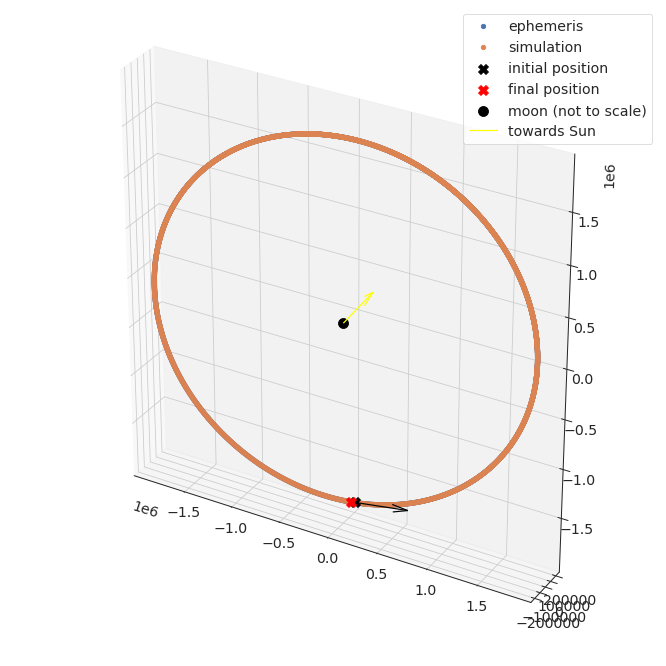

In [20]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot(df, label):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
    
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  df[f"{acc_name}_x"], df[f"{acc_name}_y"], df[f"{acc_name}_z"], length=2e9, zorder=-1)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d', computed_zorder=False)
    
    # do_plot(df.loc["2009-07-10":"2009-07-20"])
    # do_plot(df.loc["2009-10-10":"2009-10-20"])
    # do_plot(df.loc["2010-01-01":"2010-01-02"])
    
    do_plot(df_ephemeris, "ephemeris")
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    df_init = df_ephemeris.iloc[0]
    df_final = df_ephemeris.iloc[-1]
    ax.quiver(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], df_init["vel_x"], df_init["vel_y"], df_init["vel_z"], color="black", length=5e5, normalize=True)
    ax.scatter(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], c="black", marker="X", s=100, label="initial position", zorder=5)
    ax.scatter(df_final["pos_x"], df_final["pos_y"], df_final["pos_z"], c="red", marker="X", s=100, label="final position", zorder=5)
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
    ax.set_box_aspect(np.ptp(limits, axis=1))
    # Or once Matplotlib 3.6 is released: https://stackoverflow.com/a/72928548
    
    plt.legend()
    
plot_orbit_3d(df_ephemeris, df_simulation)

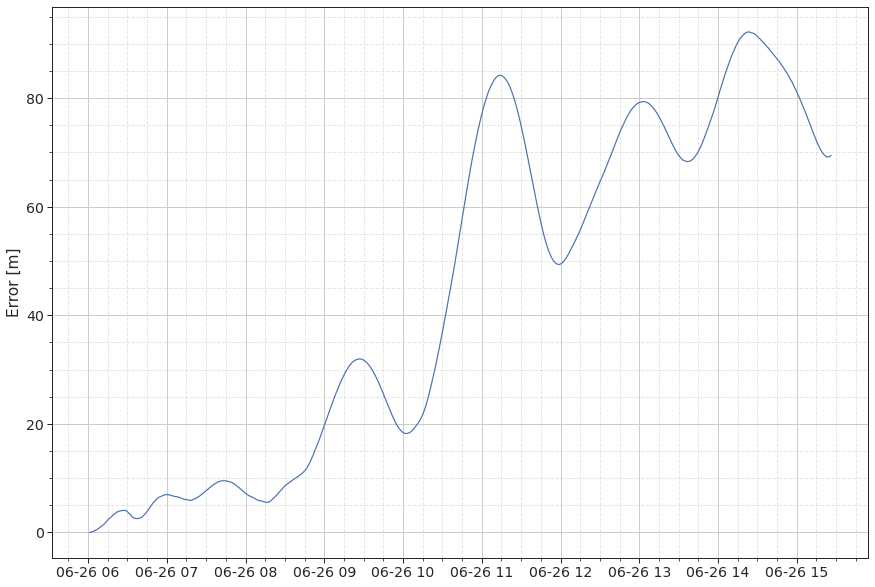

In [21]:
def plot_error(df_ephemeris, df_simulation):
    error = df_ephemeris[pos_names] - df_simulation[pos_names]
    error["total"] = np.sqrt(np.square(error).sum(axis=1))
    
    plt.figure(figsize=[12, 8])
    plt.plot(error.index, error["total"])
    plt.ylabel("Error [m]")
    format_plot()
    
plot_error(df_ephemeris, df_simulation)

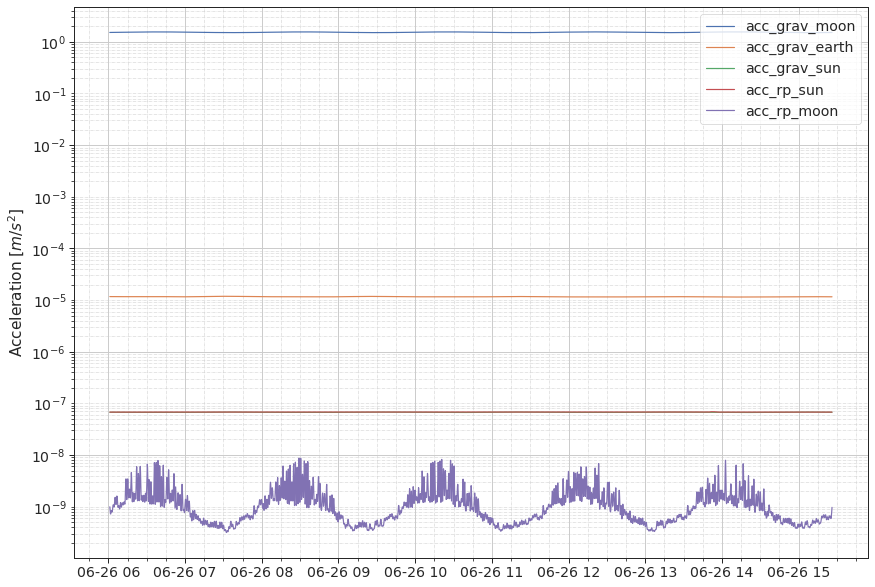

In [22]:
def plot_accelerations(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for acc in acc_names:
        plt.plot(df_simulation.index, df_simulation[acc], label=acc)
    
    plt.legend()
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.yscale("log")
    format_plot(ylocator=LogLocator(base=10, subs="all", numticks=100))
    
plot_accelerations(df_simulation)

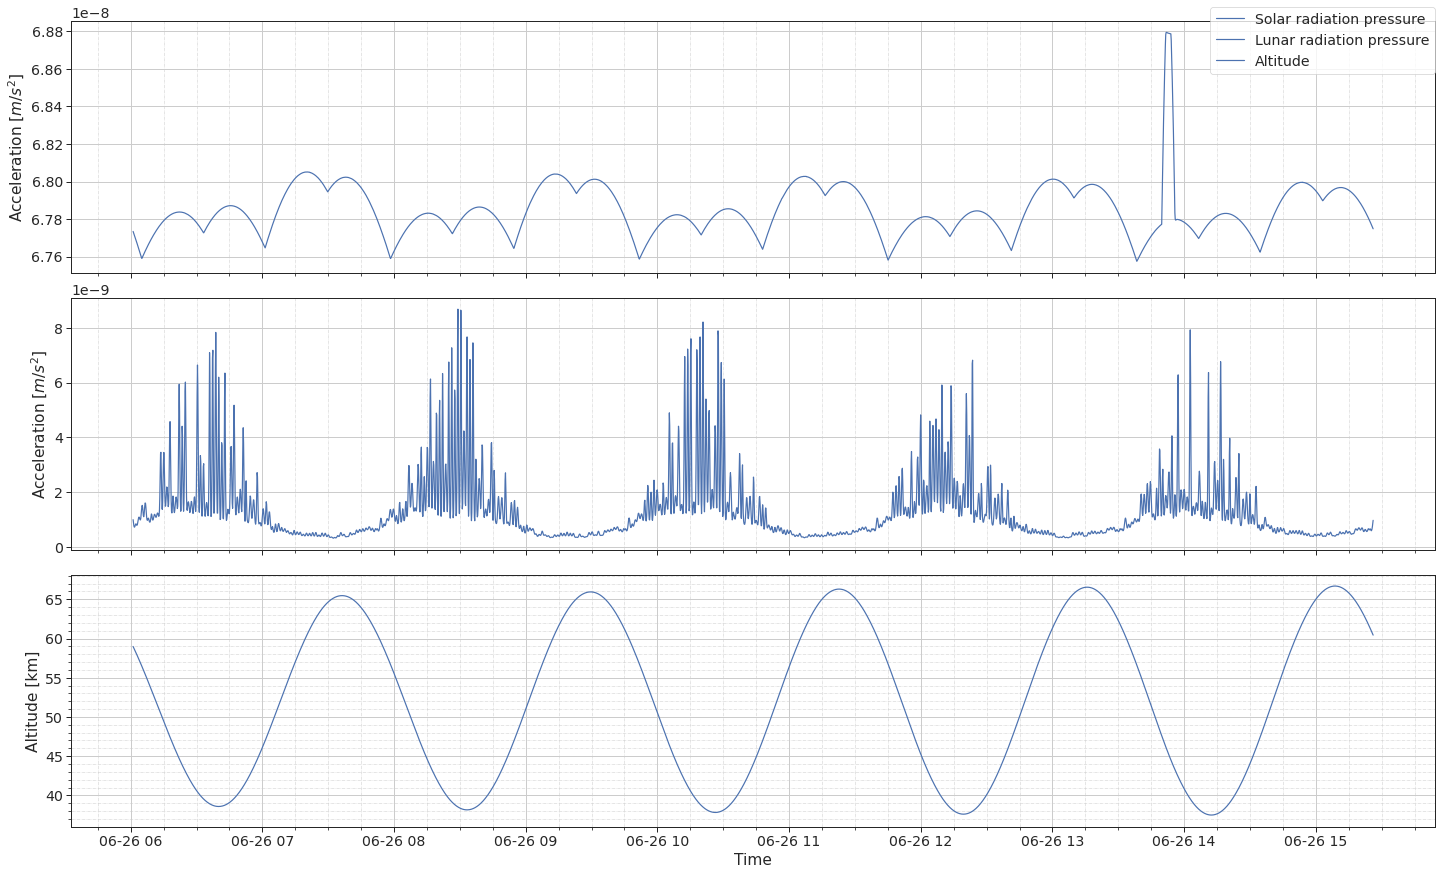

In [23]:
def plot_rp_acceleration(df_simulation):
    fig, axs = plt.subplots(3, 1, figsize=[20, 12], sharex=True)
    
    axs[0].plot(df_simulation.index, df_simulation["acc_rp_sun"], label="Solar radiation pressure")
    axs[1].plot(df_simulation.index, df_simulation["acc_rp_moon"], label="Lunar radiation pressure")
    axs[2].plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="Altitude")
    
    axs[-1].set_xlabel("Time")
    axs[0].set_ylabel("Acceleration [$m/s^2$]")
    axs[1].set_ylabel("Acceleration [$m/s^2$]")
    axs[2].set_ylabel("Altitude [km]")
    fig.legend()
    
    format_plot()
    
plot_rp_acceleration(df_simulation)

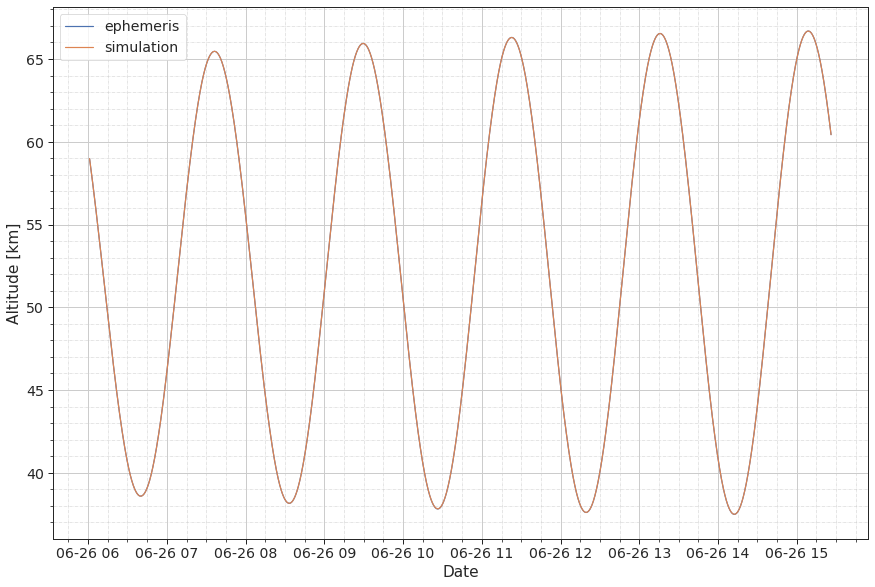

In [24]:
def plot_altitude(df_ephemeris, df_simulation):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, label="ephemeris")
    plt.plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="simulation")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    format_plot()

plot_altitude(df_ephemeris, df_simulation)

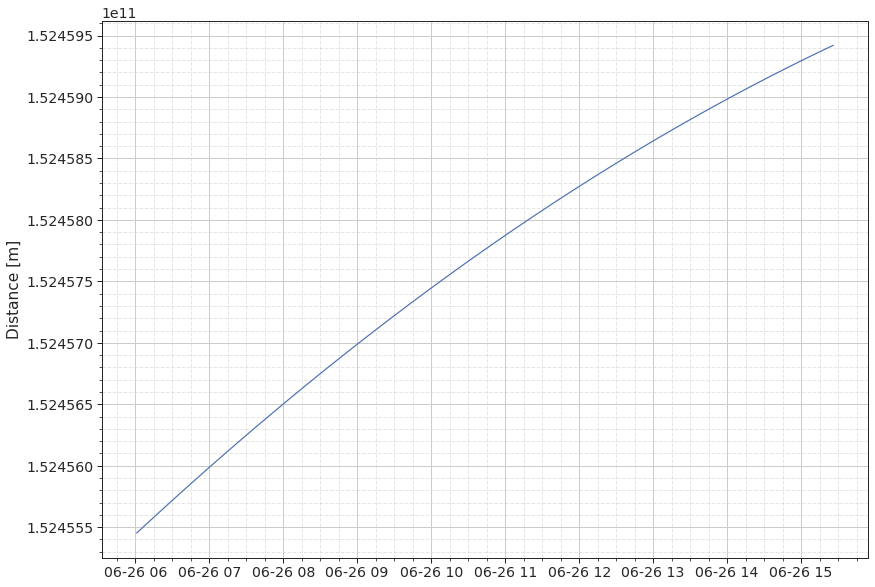

In [25]:
def plot_distance_moon_sun(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["r_sun"])
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.ylabel("Distance [m]")
    format_plot()
    
plot_distance_moon_sun(df_simulation)

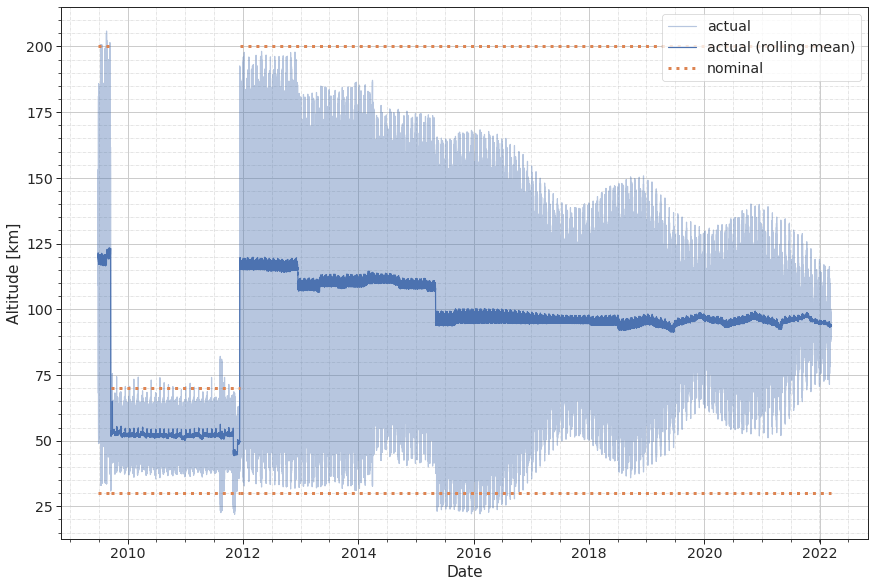

In [26]:
def plot_altitude_mission():
    from datetime import datetime as dt
    from matplotlib import dates
    
    t_start = as_et("2009-06-28")  # start of commissioning
    t_end = as_et("2022-03-15")    # latest available date
    t_et = np.arange(t_start, t_end, 60*60)  # hourly
    df_ephemeris = generate_lro_ephemeris(t_et)
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, c="C0", alpha=0.4, label="actual")
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius).rolling(20).mean() / 1e3, c="C0", label="actual (rolling mean)")
    
    plt.hlines(50-20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3, label="nominal")
    plt.hlines(50+20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    # plt.xlim([dt(2009, 9, 1), dt(2009, 11, 1)]) # entering mission orbit
    # plt.xlim([dt(2009, 9, 10), dt(2010, 6, 30)])
    
    format_plot()
    
plot_altitude_mission()